In [ ]:
# Librerias para manipulacion de Data y Gráficas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Preparación de datos y configuración de pipeline para Machine Learning con scikit-learn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

#models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
#for classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#for regression
from sklearn.metrics import r2_score

In [ ]:
datos = pd.read_csv("/content/data/datos_completos.zip")


In [ ]:
datos.head()

tipo  presion_alterial_alta  colesterol_alto   imc  enfermedad_cardiaca  \
0   0.0                    1.0              1.0  40.0                  0.0   
1   0.0                    0.0              0.0  25.0                  0.0   
2   0.0                    1.0              1.0  28.0                  0.0   
3   0.0                    1.0              0.0  27.0                  0.0   
4   0.0                    1.0              1.0  24.0                  0.0   

   hace_ejercicio  come_fruta  come_vegetales  edad  dificultad_caminar  \
0             0.0         0.0             1.0   9.0                 1.0   
1             1.0         0.0             0.0   7.0                 0.0   
2             0.0         1.0             0.0   9.0                 1.0   
3             1.0         1.0             1.0  11.0                 0.0   
4             1.0         1.0             1.0  11.0                 0.0   

   genero  fuma  
0     0.0   1.0  
1     0.0   1.0  
2     0.0   0.0  
3     0.0   0.0  
4     0.0   0.0

In [ ]:
datos.shape

(253680, 12)

Nota:
Pero si quieres tener un solo número global, se usan estos tipos de promedios,

Macro promedio (macro average) (Promedio de especificidades)
Calcula la métrica para cada clase individualmente.
Luego hace el promedio simple de todas las clases, sin importar cuántas instancias hay de cada clase.

Micro promedio (micro average)
Suma todos los verdaderos positivos, falsos positivos, etc. de todas las clases juntas, y luego calcula la métrica.
Pesa más las clases con más ejemplos.
Es útil para medir el desempeño general del modelo, especialmente cuando las clases están desbalanceadas.

Promedio ponderado (weighted average)
Calcula la métrica para cada clase.
Luego hace un promedio ponderado según cuántas instancias hay en cada clase.

# Modelo 1


In [ ]:
#Selección de la caracteristica o función objetivo y el resto de los datos
X = datos.drop("tipo",axis=1)
y = datos['tipo']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7) #aca se hacen todas las particiones
#70%   , 30%   , 80%    , 20%
#siendo 70 y 80 datos de entrenamiento y 30 y 20 datos de testeo

In [ ]:
'''Acá se está creando un modelo de regresión logística utilizando LogisticRegression de la biblioteca scikit-learn.
max_iter=1000: Estableces el número máximo de iteraciones para que el modelo pueda converger (es decir, encontrar los mejores coeficientes para los datos). Esto es útil si tienes un conjunto de datos complejo o grandes cantidades de datos.'''
model = LogisticRegression(max_iter=1000)#esa cantidad de iteraciones son las famosas epocas.


In [ ]:
model.fit(X_train,y_train) #aca entrenamos el modelo

LogisticRegression(max_iter=1000)

In [ ]:
'''Utilizar el modelo entrenado (model) para predecir las etiquetas (tipo) para el conjunto de datos de prueba (X_test).
Genera un array (y_predict) que contiene las predicciones del modelo (0,1,2), basado en las características presentes en X_test.'''
y_predict = model.predict(X_test)

The accuracy of Logistic Regression is 0.8446


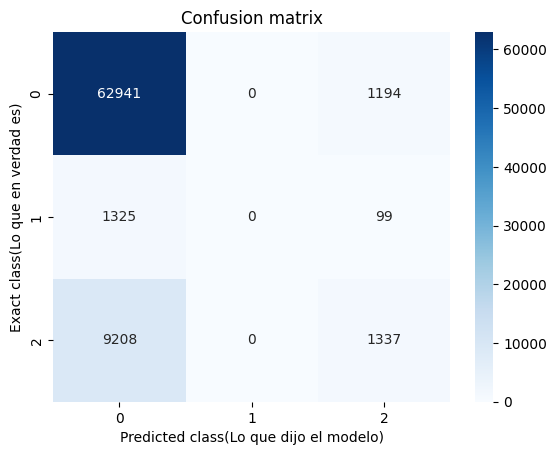

In [ ]:
#evaluación del modelo
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Logistic Regression is {:.4f}'.format(accuracy))


confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class(Lo que dijo el modelo)')
plt.ylabel('Exact class(Lo que en verdad es)');

serie = pd.Series(accuracy,index=['LogisticRegression'])
accuracy_Logmodel = pd.DataFrame({'accuracy':serie})

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.8446073793755913

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.91     64135
         1.0       0.00      0.00      0.00      1424
         2.0       0.51      0.13      0.20     10545

    accuracy                           0.84     76104
   macro avg       0.46      0.37      0.37     76104
weighted avg       0.79      0.84      0.80     76104

Specificity for class 0: 0.1200
Specificity for class 1: 1.0000
Specificity for class 2: 0.9803



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Clase 1 sigue completamente ignorada.
Clase 2 con mejoras en precisión, pero muy bajo recall.

Macro F1: 0.37 → Desempeño global deficiente.

Weighted F1: 0.80 → Inflado por clase 0.

Alta accuracy ≠ buen modelo, dado el fuerte desbalance.

# Modelo 2


In [ ]:
X = datos.drop("tipo",axis=1)
y = datos['tipo']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [ ]:
model = KNeighborsClassifier() #con esto basta para entrenar el modelo gracias a sklearn
model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_predict = model.predict(X_test)

The accuracy of KNeighborsClassifier is 0.8320


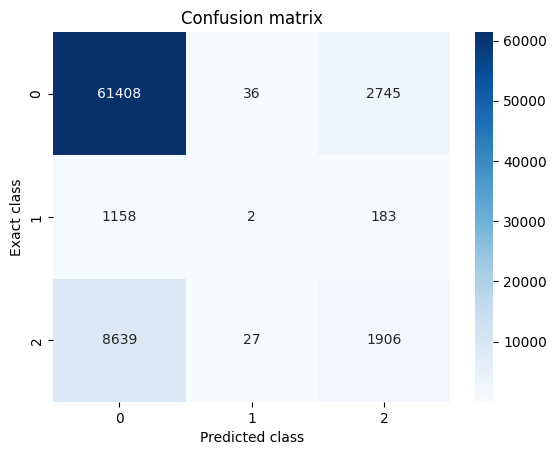

In [ ]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of KNeighborsClassifier is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['KNeighborsClassifier'])
accuracy_KNmodel = pd.DataFrame({'accuracy':serie})

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.8319667822979081

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     64189
         1.0       0.03      0.00      0.00      1343
         2.0       0.39      0.18      0.25     10572

    accuracy                           0.83     76104
   macro avg       0.43      0.38      0.39     76104
weighted avg       0.78      0.83      0.80     76104

Specificity for class 0: 0.1778
Specificity for class 1: 0.9992
Specificity for class 2: 0.9553



Parece alto, pero engañoso: el modelo acierta casi todo en la clase 0, que es la mayoritaria.

    Clase 1 completamente ignorada.
🟡 Clase 2 con desempeño muy bajo.
🟢 El modelo se enfoca casi solo en la clase 0.

Macro F1: 0.39 → Malo, refleja mal desempeño general.
Weighted F1: 0.80 → Inflado por la clase 0.

0  0.1778 ❌ → Muchas predicciones incorrectas como clase 0
1	0.9992 ✅ → Casi nunca se predice como 1
2	0.9553 ✅

# Modelo 3

In [ ]:
X = datos.drop("tipo",axis=1)
y = datos['tipo']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_predict = model.predict(X_test)

The accuracy of Decision Tree is 0.8161


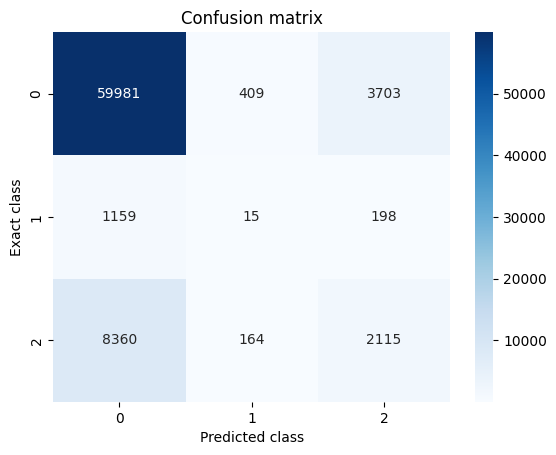

In [ ]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Decision Tree is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['DecisionTreeClassifier'])
accuracy_DTmodel = pd.DataFrame({'accuracy':serie})

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.8161331861662987

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     64093
         1.0       0.03      0.01      0.02      1372
         2.0       0.35      0.20      0.25     10639

    accuracy                           0.82     76104
   macro avg       0.41      0.38      0.39     76104
weighted avg       0.78      0.82      0.79     76104

Specificity for class 0: 0.2075
Specificity for class 1: 0.9923
Specificity for class 2: 0.9404



Esto indica que el modelo acierta en el 81.6% de los casos.
✅ Aparentemente bien… pero cuidado: la mayoría de los aciertos están en la clase 0.

Clase 1 está completamente ignorada por el modelo (recall = 0.01).
La clase 2 tiene un desempeño pobre.
Clase 0 domina por completo la predicción (porque es la mayoritaria).

acro F1 = 0.39 → El modelo tiene un desempeño pobre si consideramos todas las clases por igual.
🟡 Weighted F1 = 0.79 → Se ve mejor porque la clase 0 es muy dominante, y ahí el modelo acierta bien.

0	0.2075 (bajo) ❌
1	0.9923 (alto) ✅
2	0.9404 (alto) ✅